In [1]:
#Summarizing the data to get a sense of Users behaviour or awareness in cyber security in NGS.
# This includes Chi-Square Test:  Summarize user responses to Assess the association between user demographics (e.g., age group, role) and 
# their cybersecurity awareness or behaviors in Next generation Sequencing by using relevant questions. 
import pandas as pd
import scipy.stats as stats

In [2]:
file_path = "cleaneddata_NGS.csv"
df = pd.read_csv(file_path)

In [3]:
# Relevant columns to analyze
columns_to_analyze = [
    #1
    'Please indicate your role within the organization:',
    #2
    'How long have you been working in the NGS',
    #3
    'How often do you handle sensitive NGS data that could be targeted in a cybersecurity attack',
    #4
    'How often do you open emails from unknown senders as part of your work',
    #5
    'Have you ever used a personal USB drive or other external storage devices to transfer NGS data?',
    #6
    'Do you follow a process to verify the security of websites or links before accessing them, especially when related to NGS research',
   #7
    'Have you ever shared your login credentials with a colleague, even if you believed it was for a legitimate purpose',
   #8
    'In the event of receiving a suspicious email, what actions do you typically take (Select all that apply)',
    #9
    'Has there been an instance where you accessed NGS data from a public Wi-Fi network',
    #10
    'How frequently do you engage in non-work-related activities (e.g., browsing social media, personal emails) on devices used to access NGS data systems',
    #11
    'Do you regularly update your computer, smartphone, and other devices with the latest security patches and software updates',
    #12
    'Have you ever fallen victim to a phishing email or scam',
    #13
    'Are you aware of the potential cybersecurity risks associated with next-generation sequencing (NGS) technologies',
    #14
    'Do you understand the importance of securing genomic data generated by NGS technologies to protect patient privacy and confidentiality',
    #15
    'Are you familiar with common cybersecurity threats and vulnerabilities that can affect NGS data, such as data breaches, ransomware attacks, unauthorized access, fishing attack,  targeted attacks on genomic data or manipulation of sequencing results', 
    #16
    'Have you implemented data backup and disaster recovery plans to ensure the resilience of NGS data in the event of cyberattacks or system failures',
     #18
    'How confident are you in identifying a cybersecurity threat specific to NGS operations',
    #22
    'When handling sensitive NGS data, which of the following practices do you regularly follow (Select all that apply)',
    #23
    'Have you or anyone in your team ever detected a potential cybersecurity threat',
    #29
    'Have you ever received suspicious emails or messages that you suspect may target NGS data or systems',
    #31
    'Do you feel that cybersecurity should be a priority in your NGS relates tasks or experiments',
    #32
    'Do you use encryption techniques to secure NGS data during transmission and storage',
    #33
    'Do you collaborate with cybersecurity experts or professionals to enhance the security posture of NGS systems and data',
    #34
    'Do you feel that the  careless behaviors could lead to potential cybersecurity risks to the sensitive and private data in NGS',
    #35
    'Has there been a cybersecurity incident within your organization such as hacking, password stealing etc.,  that led to changes or enhancements in the training program or policy change',
    #39
    'What is your age group',
    #40
    'Have you heard about the term Bio-Cyber Security'
]

In [4]:
# Rename columns to be more formula-friendly
df.rename(columns={
      'Please indicate your role within the organization:': 'role_in_organization',
    'How long have you been working in the NGS':'time_duration',
    'How often do you handle sensitive NGS data that could be targeted in a cybersecurity attack': 'handle_sensitive_data',
    'How often do you open emails from unknown senders as part of your work':'open_emails',
    'Have you ever used a personal USB drive or other external storage devices to transfer NGS data':'usb_for_datatransfer',
    'Do you follow a process to verify the security of websites or links before accessing them, especially when related to NGS research':'website_verification',
    'Have you ever shared your login credentials with a colleague, even if you believed it was for a legitimate purpose':'sharing_credentials',
    'In the event of receiving a suspicious email, what actions do you typically take (Select all that apply)':'suspicious_email_actions',
    'Has there been an instance where you accessed NGS data from a public Wi-Fi network':'public_wifi',
    'How frequently do you engage in non-work-related activities (e.g., browsing social media, personal emails) on devices used to access NGS data systems':'activities',
    'Do you regularly update your computer, smartphone, and other devices with the latest security patches and software updates':'Updates',
    'Have you ever fallen victim to a phishing email or scam':'phishing',
    'Are you aware of the potential cybersecurity risks associated with next-generation sequencing (NGS) technologies': 'aware_attack',
    'Do you understand the importance of securing genomic data generated by NGS technologies to protect patient privacy and confidentiality':'securing_genomic_data',
    'Are you familiar with common cybersecurity threats and vulnerabilities that can affect NGS data, such as data breaches, ransomware attacks, unauthorized access, fishing attack,  targeted attacks on genomic data or manipulation of sequencing results': 'familiarity_cs', 
    'Have you implemented data backup and disaster recovery plans to ensure the resilience of NGS data in the event of cyberattacks or system failures': 'Backup',
    'How confident are you in identifying a cybersecurity threat specific to NGS operations': 'threat_identification',
    'When handling sensitive NGS data, which of the following practices do you regularly follow (Select all that apply)': 'handling',
     'Have you or anyone in your team ever detected a potential cybersecurity threat': 'threat_detection',
    'Have you ever received suspicious emails or messages that you suspect may target NGS data or systems': 'suspicious_emails',
    'Do you feel that cybersecurity should be a priority in your NGS relates tasks or experiments': 'cs_as_priority',
    'Do you use encryption techniques to secure NGS data during transmission and storage': 'encryption_techniques',
    'Do you collaborate with cybersecurity experts or professionals to enhance the security posture of NGS systems and data':'collaboration', 
    'Do you feel that the  careless behaviors could lead to potential cybersecurity risks to the sensitive and private data in NGS': 'careless_behaviour',
    'Has there been a cybersecurity incident within your organization such as hacking, password stealing etc.,  that led to changes or enhancements in the training program or policy change' : 'policy change',
    'What is your age group': 'age_group',
    'Have you heard about the term Bio-Cyber Security': 'Bio-Cyber_Security_familiarity'
}, inplace=True)

In [5]:
# Update columns_to_analyze with the renamed columns
columns_to_analyze = [
    'role_in_organization',
    'time_duration',
    'handle_sensitive_data',
    'open_emails',
    'usb_for_datatransfer',
    'website_verification',
    'sharing_credentials',
    'suspicious_email_actions',
    'public_wifi',
    'activities',
    'Updates',
    'phishing',
    'aware_attack',
    'securing_genomic_data',
    'familiarity_cs', 
    'Backup',
    'threat_identification',
    'handling',
    'threat_detection',
    'suspicious_emails',
    'cs_as_priority',
    'encryption_techniques',
    'collaboration', 
    'careless_behaviour',
    'policy change',
    'age_group',
    'Bio-Cyber_Security_familiarity'
]

In [6]:
# Map categorical responses to numerical values
def create_frequency_mapping(df, columns):
    unique_values = set()
    for col in columns:
        unique_values.update(df[col].dropna().unique())
    
    unique_values = sorted(list(unique_values))
    mapping = {value: index for index, value in enumerate(unique_values)}
    
    return mapping

In [7]:
frequency_mapping = create_frequency_mapping(df, columns_to_analyze)

In [8]:
# Convert relevant columns using the mapping
for col in columns_to_analyze:
    df[col] = df[col].map(frequency_mapping)


In [9]:
# Select demographics columns
demographics_columns = ['age_group', 'role_in_organization']

In [10]:
# Perform Chi-Square tests
chi_square_results = {}

In [11]:
for demo_col in demographics_columns:
    for behavior_col in columns_to_analyze:
        contingency_table = pd.crosstab(df[demo_col], df[behavior_col])
        chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
        chi_square_results[f'{demo_col} vs {behavior_col}'] = {'chi2': chi2, 'p-value': p, 'dof': dof, 'expected_freq': ex}

In [12]:
# Display the Chi-Square test results
for key, result in chi_square_results.items():
    print(f'Chi-Square Test for {key}:')
    print(f"Chi2: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    print(f"Degrees of Freedom: {result['dof']}")
    print(f"Expected Frequencies: \n{result['expected_freq']}\n")

Chi-Square Test for age_group vs role_in_organization:
Chi2: 90.03872698015377
P-value: 1.5892042626849433e-10
Degrees of Freedom: 21
Expected Frequencies: 
[[7.12121212e-01 3.56060606e+00 7.12121212e-01 1.42424242e+00
  1.42424242e+00 7.12121212e-01 3.63181818e+01 2.13636364e+00]
 [1.51515152e-01 7.57575758e-01 1.51515152e-01 3.03030303e-01
  3.03030303e-01 1.51515152e-01 7.72727273e+00 4.54545455e-01]
 [1.06060606e-01 5.30303030e-01 1.06060606e-01 2.12121212e-01
  2.12121212e-01 1.06060606e-01 5.40909091e+00 3.18181818e-01]
 [3.03030303e-02 1.51515152e-01 3.03030303e-02 6.06060606e-02
  6.06060606e-02 3.03030303e-02 1.54545455e+00 9.09090909e-02]]

Chi-Square Test for age_group vs time_duration:
Chi2: 46.15531914893618
P-value: 0.0002815798432064124
Degrees of Freedom: 18
Expected Frequencies: 
[[2.84848485e+00 7.83333333e+00 3.13333333e+01 7.12121212e-01
  1.42424242e+00 7.12121212e-01 2.13636364e+00]
 [6.06060606e-01 1.66666667e+00 6.66666667e+00 1.51515152e-01
  3.03030303e-01 1.5

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:

# Sample Chi-Square test results for demonstration
chi_square_results = {
    'age_group vs role_in_organization': {
        'chi2': 90.03872698015377,
        'p-value': 1.5892042626849433e-10,
        'dof': 21,
        'expected_freq': np.array([
            [7.12121212e-01, 3.56060606e+00, 7.12121212e-01, 1.42424242e+00, 1.42424242e+00, 7.12121212e-01, 3.63181818e+01, 2.13636364e+00],
            [1.51515152e-01, 7.57575758e-01, 1.51515152e-01, 3.03030303e-01, 3.03030303e-01, 1.51515152e-01, 7.72727273e+00, 4.54545455e-01],
            [1.06060606e-01, 5.30303030e-01, 1.06060606e-01, 2.12121212e-01, 2.12121212e-01, 1.06060606e-01, 5.40909091e+00, 3.18181818e-01],
            [3.03030303e-02, 1.51515152e-01, 3.03030303e-02, 6.06060606e-02, 6.06060606e-02, 3.03030303e-02, 1.54545455e+00, 9.09090909e-02]
        ])
    },
    # Add more results as needed
}

In [15]:
# Extracting data
keys = list(chi_square_results.keys())
chi2_values = [chi_square_results[key]['chi2'] for key in keys]
p_values = [chi_square_results[key]['p-value'] for key in keys]
dof_values = [chi_square_results[key]['dof'] for key in keys]


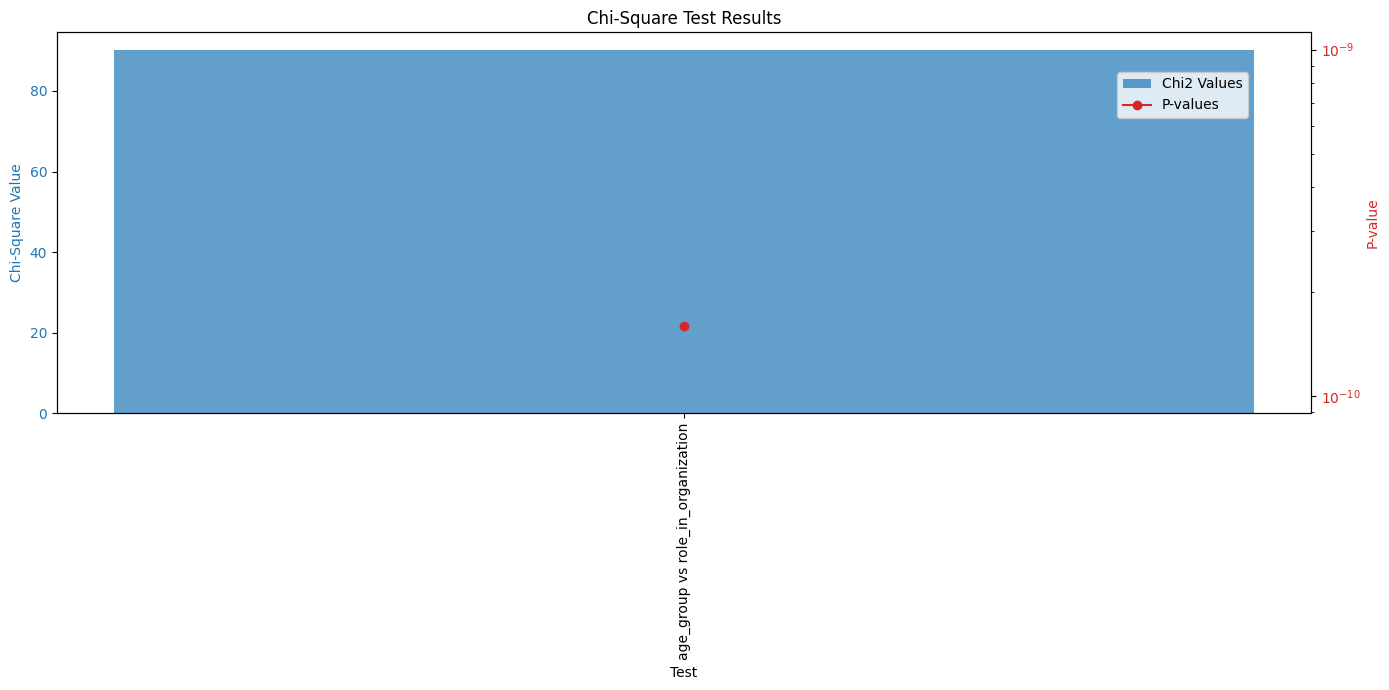

In [16]:

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_title('Chi-Square Test Results')
ax1.set_xlabel('Test')
ax1.set_ylabel('Chi-Square Value', color='tab:blue')
ax1.bar(keys, chi2_values, color='tab:blue', alpha=0.7, label='Chi2 Values')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.set_ylabel('P-value', color='tab:red')
ax2.plot(keys, p_values, color='tab:red', marker='o', label='P-values')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_yscale('log')

fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()